# Loading pretrained AutoKeras Model And predicting Images

Loading important Library

In [1]:
import os
import autokeras as ak
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

function for Preprocessing of images

In [2]:
def preprocess(path):
    img_array = imread(path)
    img_resized = resize(img_array,(150,150,3))
    return img_resized

Loading autokeras model "model_autokeras.h5"

In [3]:
model = load_model("model_autokeras.h5",custom_objects=ak.CUSTOM_OBJECTS)
# Model Summary
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 150, 150, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 150, 150, 3)       7         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)       

loading image for predict

In [4]:
path = "D:\\Images\\test\\test"
# dire = "D:\\Images\\test\\test\\m2"

In [5]:
images = []

count = 0
# for img in os.listdir(path)[:5]:
for img in os.listdir(path):
    img = preprocess(os.path.join(path,img))        
    images.append(img)

    count = count + 1
    print(count,end='  ')

1  2  3  4  5  6  

Convert images in numpy array

In [6]:
images = np.array(images)

predicting images through model

In [7]:
pred = model.predict(images).round(2)
print(pred)

[[0.  ]
 [0.  ]
 [0.01]
 [0.99]
 [1.  ]
 [0.96]]


Printing Predicted Result 

Predicted Image Is : Glacier


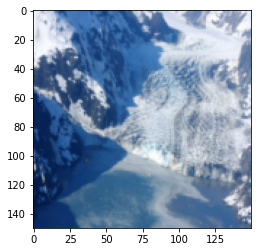


Predicted Image Is : Glacier


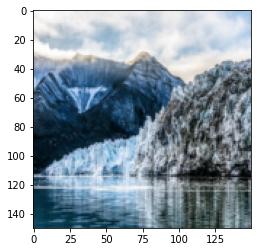


Predicted Image Is : Glacier


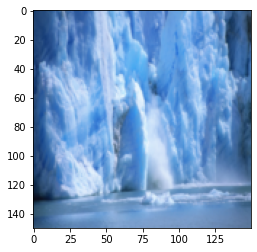


Predicted Image Is : Mountain


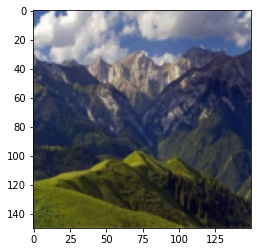


Predicted Image Is : Mountain


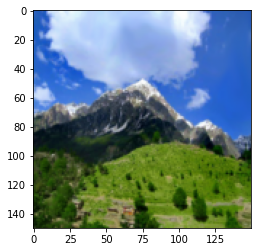


Predicted Image Is : Mountain


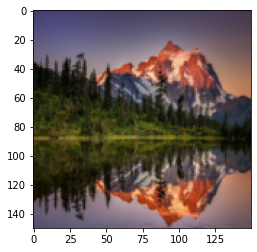

In [8]:
for i in range(len(pred)):
    img = images[i]
    res = pred[i][0]
    if res <= 0.5:
        print("Predicted Image Is : Glacier")
        plt.imshow(img)
        plt.show()
        print()
        
    if res > 0.5:
        print("Predicted Image Is : Mountain")
        plt.imshow(img)
        plt.show()
        print()